# Reading data and creating required columns

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = pd.read_csv("ENB2012_data.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
data.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [10]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [11]:
data.shape

(768, 10)

In [12]:
pd.isnull(data).sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

# Adding columns for overall load

In [14]:
data['Overall Load'] = data['Heating Load'] + data['Cooling Load']
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


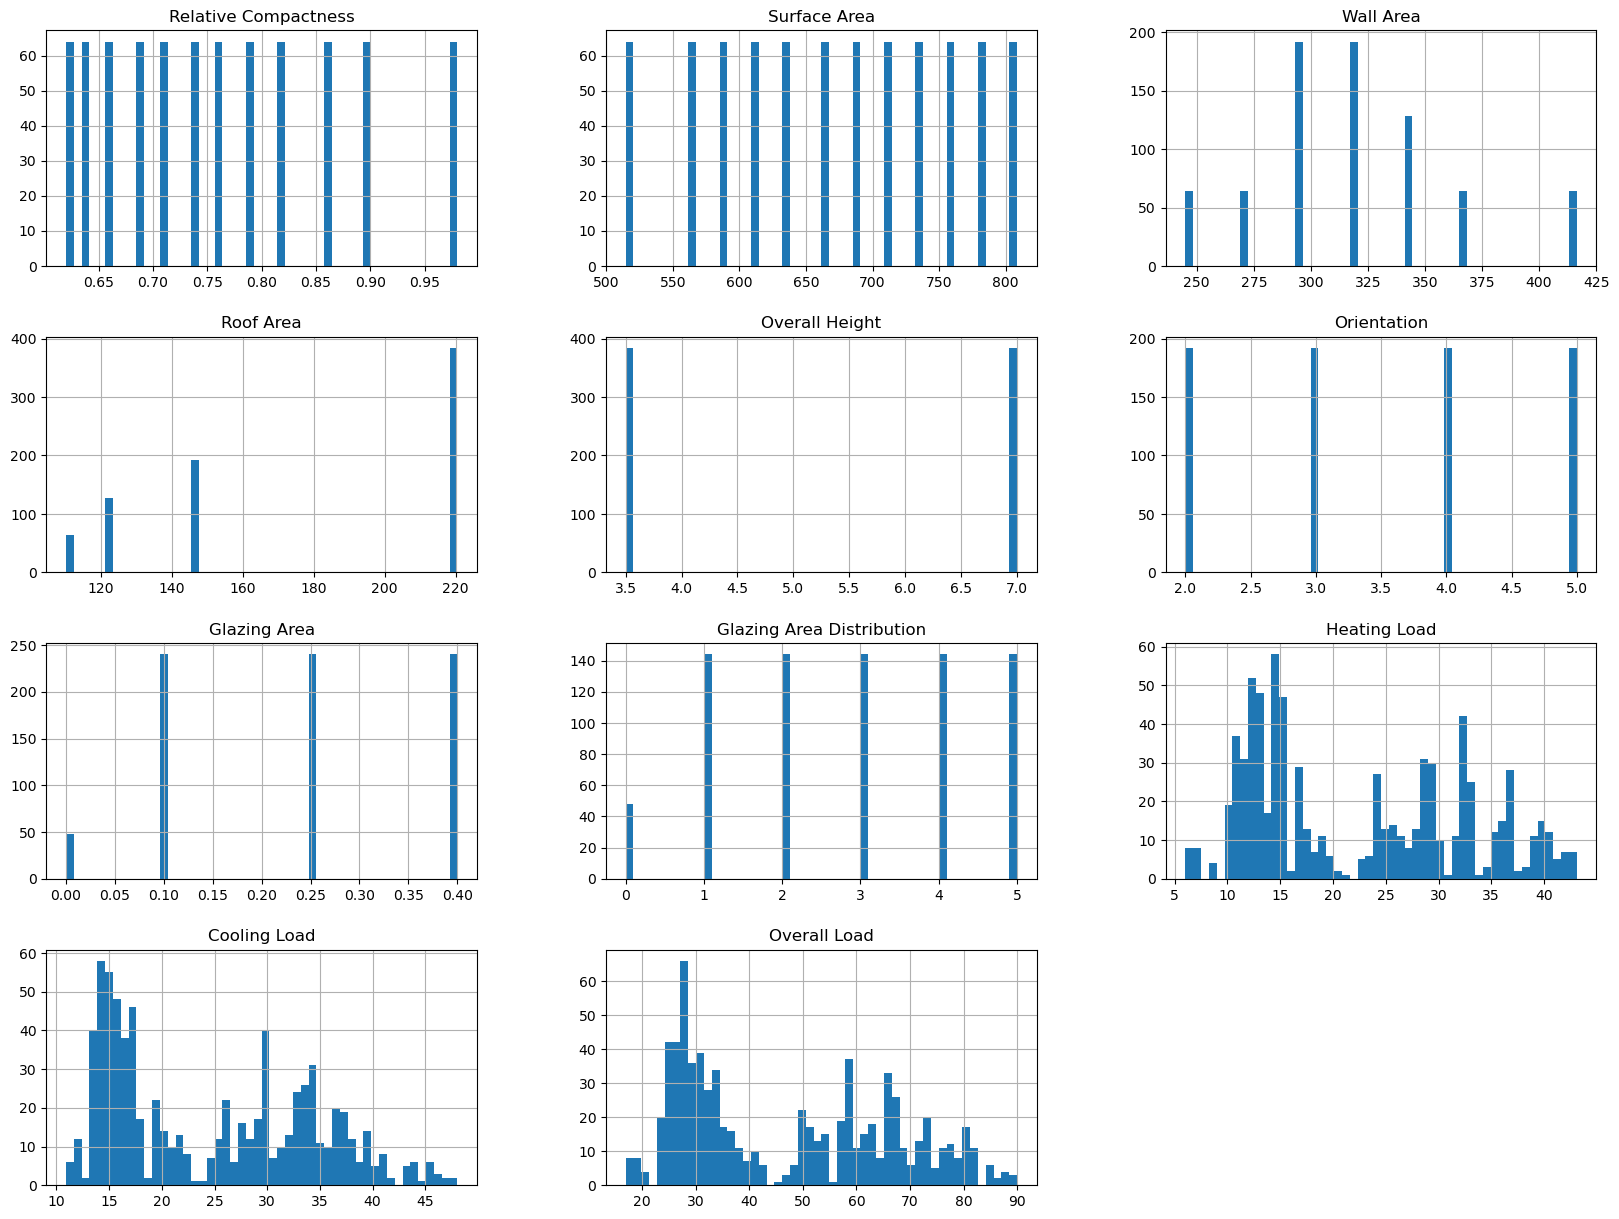

In [16]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
data.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339,0.631950
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999,-0.669389
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117,0.444502
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547,-0.867423
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785,0.897945
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290,0.005637
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505,0.241048
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525,0.069911
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862,0.994299
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000,0.993585


In [ ]:
sns.kdeplot(data)

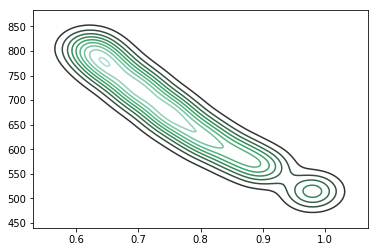

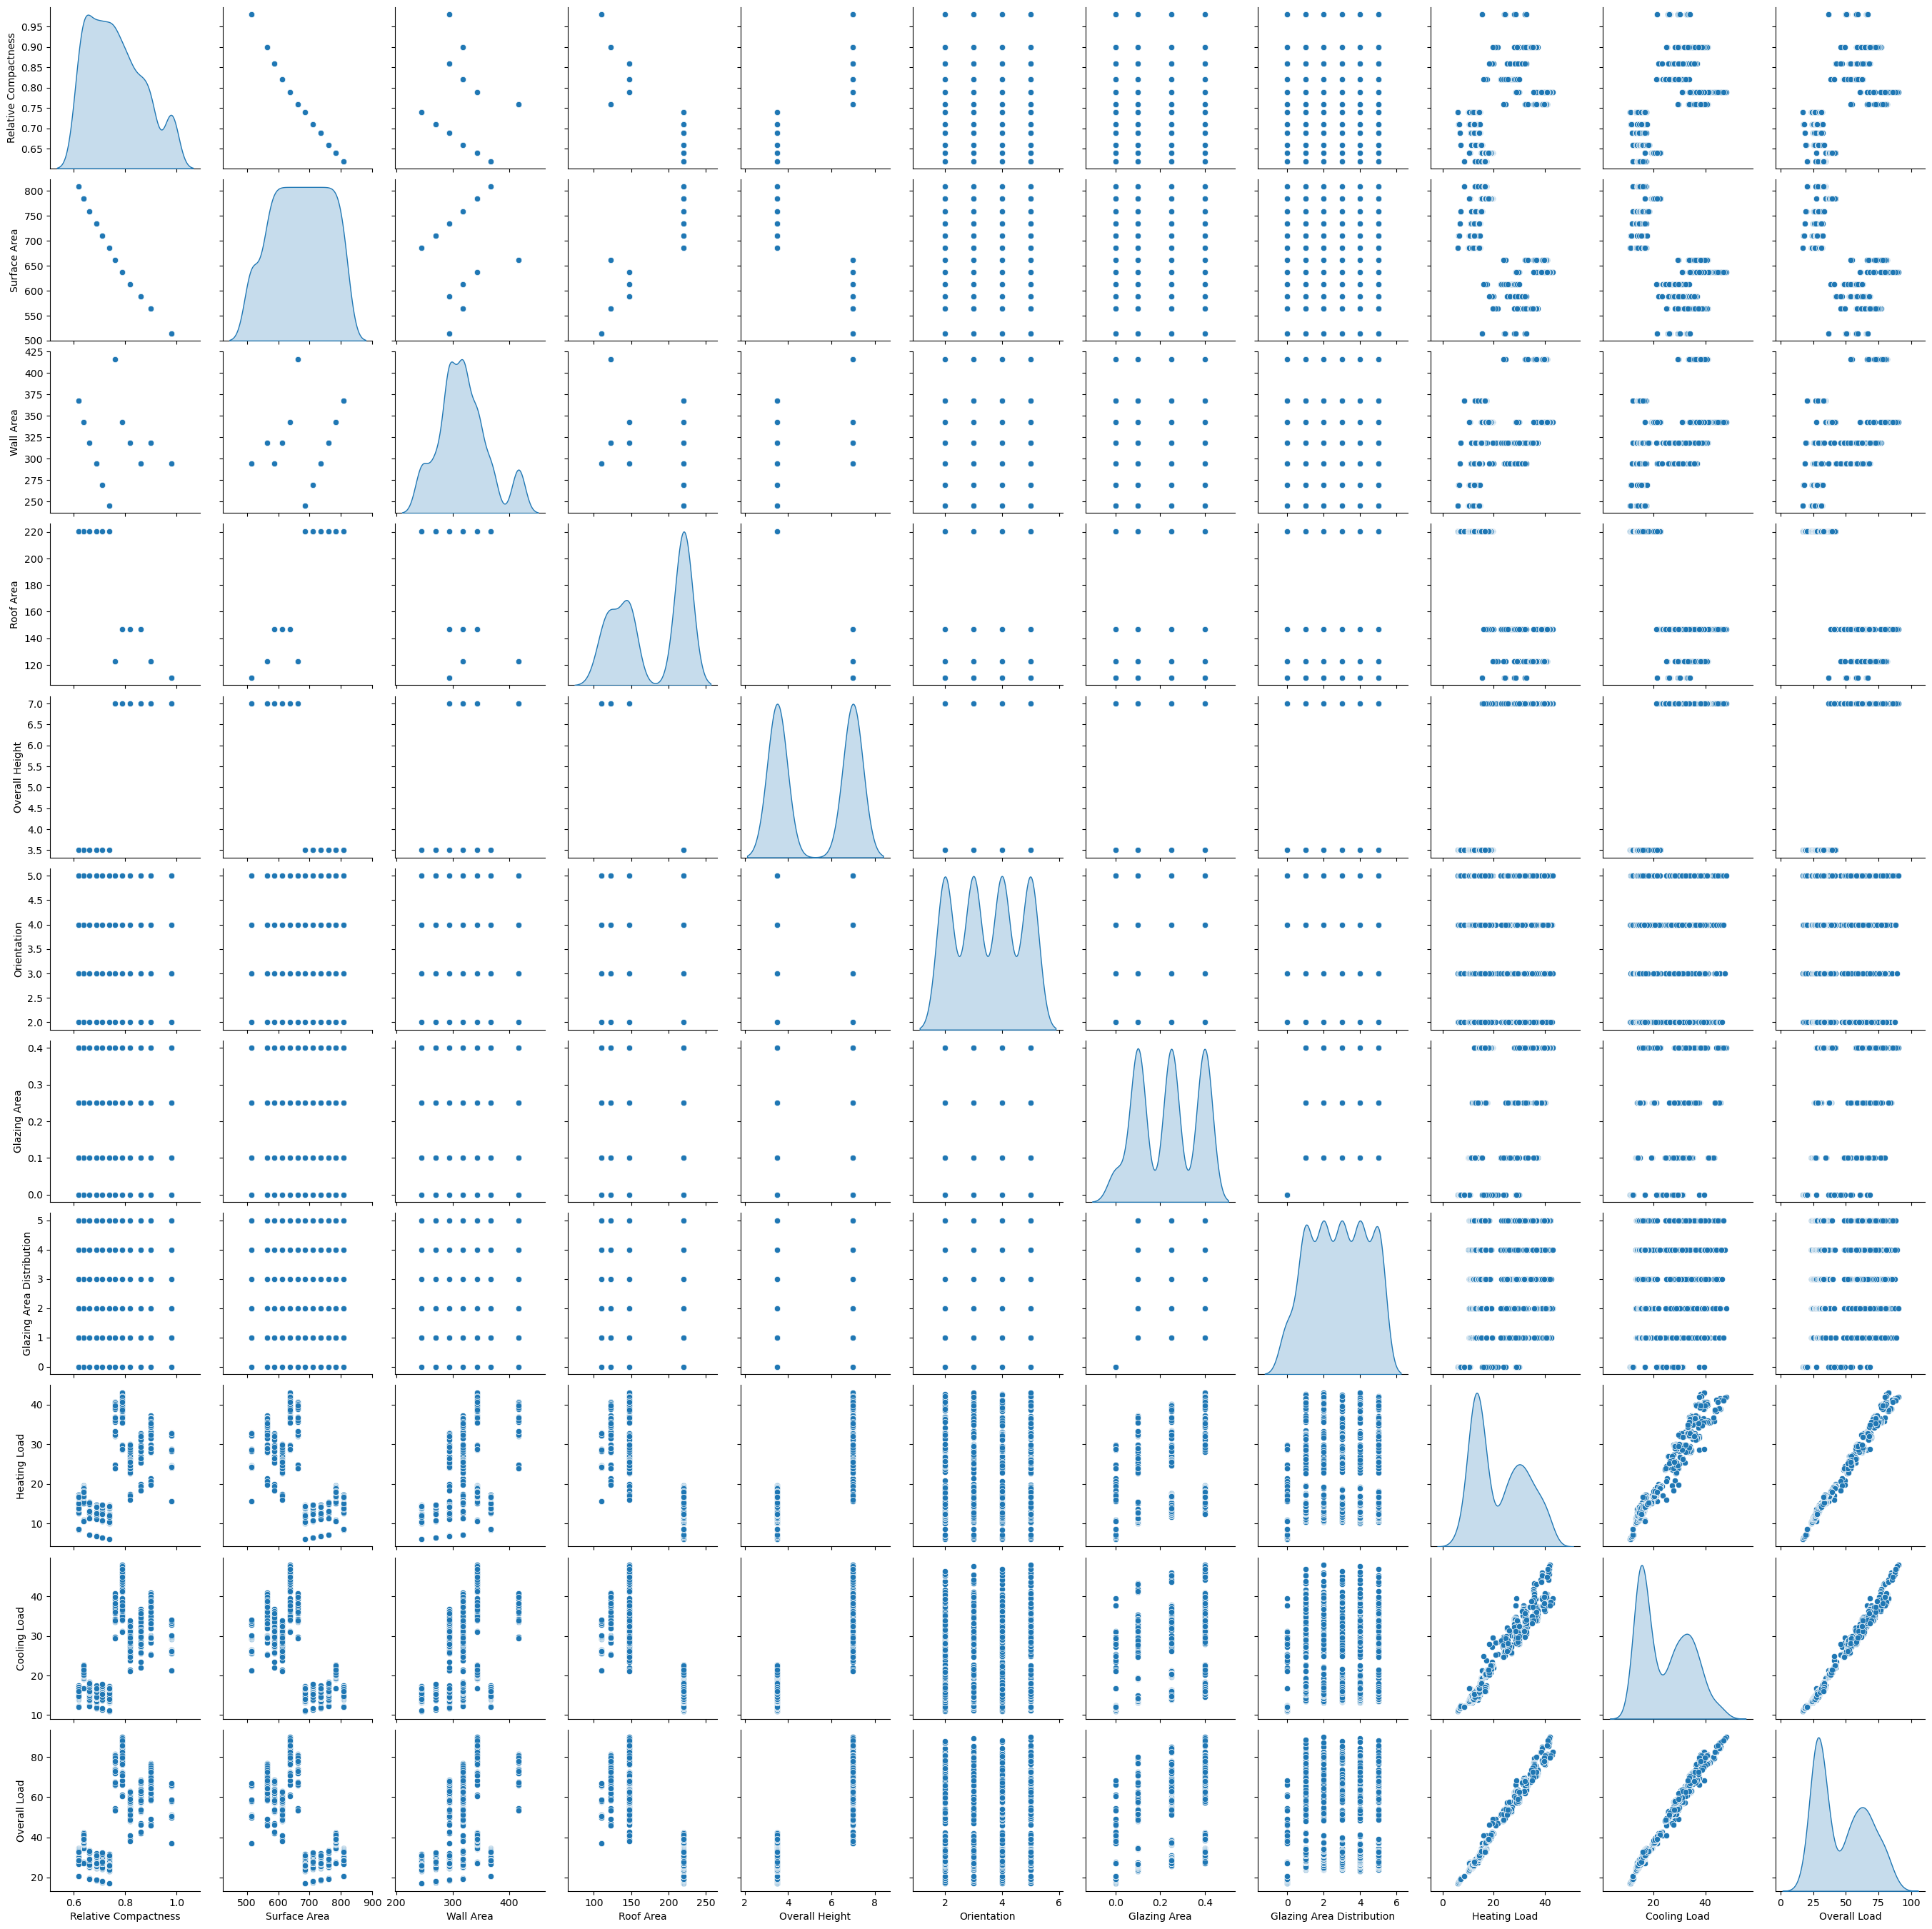

In [21]:
sns.pairplot(data,kind='scatter',diag_kind='kde')

<AxesSubplot:>

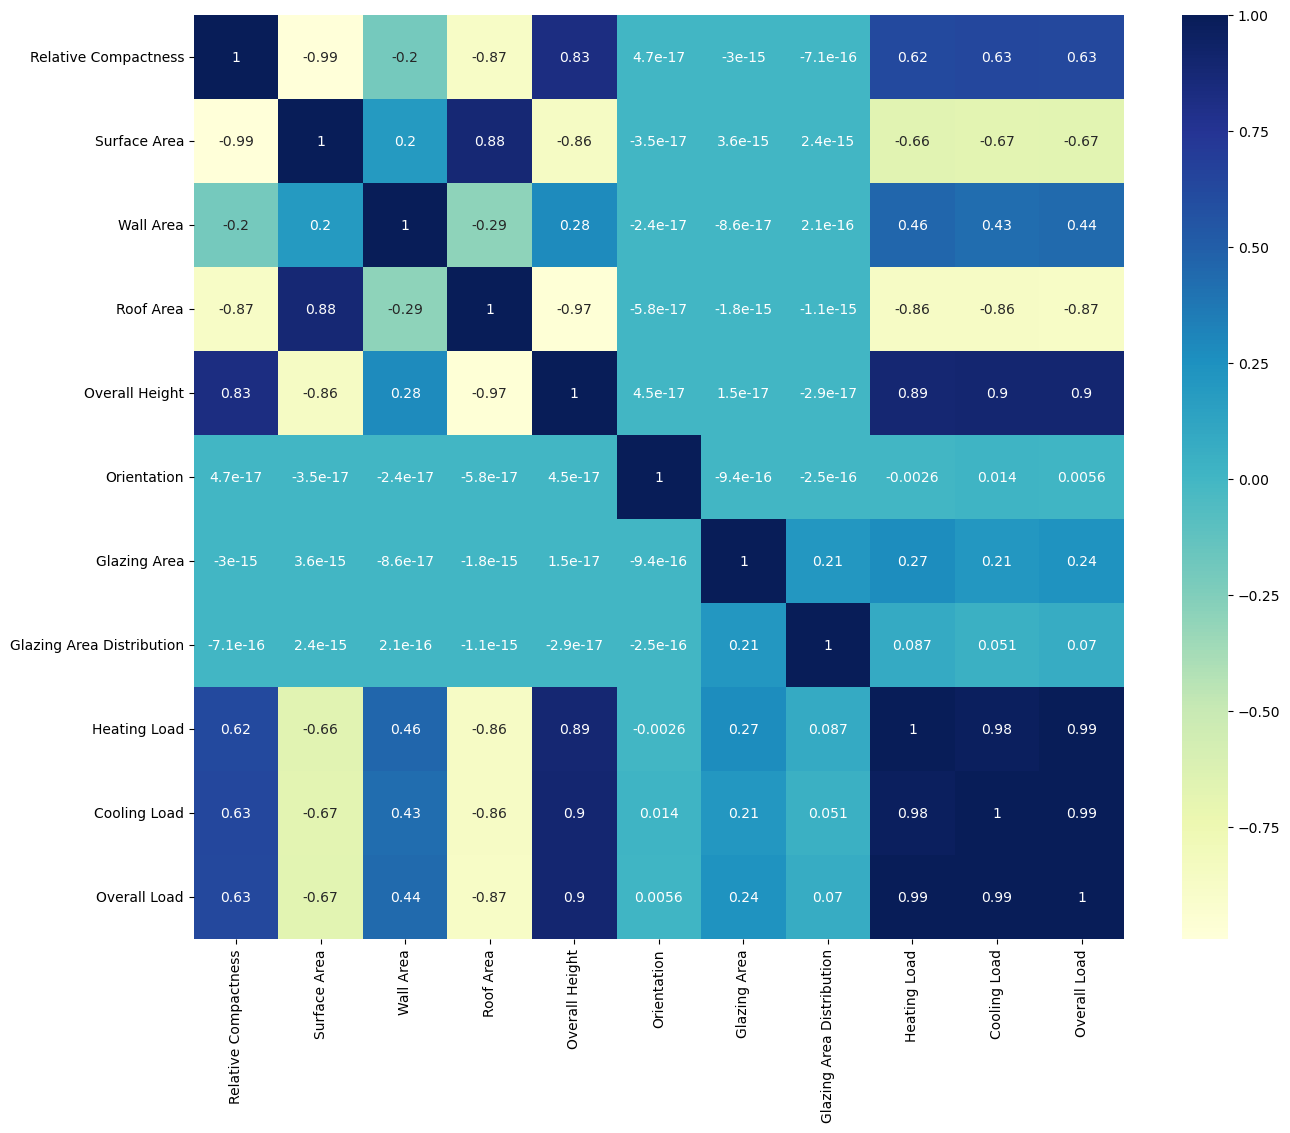

In [23]:
plt.subplots(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")

# Trend of overall load

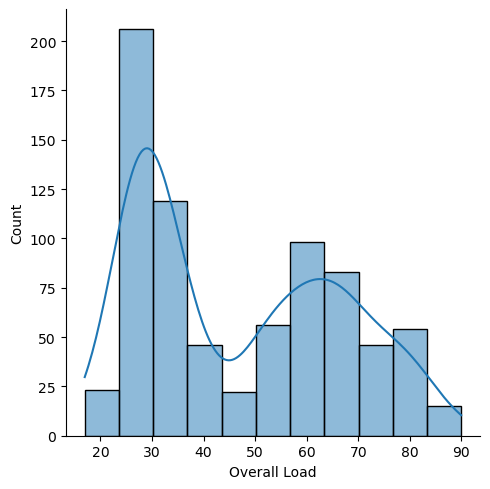

In [25]:
sns.displot(data['Overall Load'],kde='True')

{'whiskers': [<matplotlib.lines.Line2D at 0x1e759d40bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e759d433d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e759d40820>],
 'medians': [<matplotlib.lines.Line2D at 0x1e759d43a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e759d43e50>],
 'means': []}

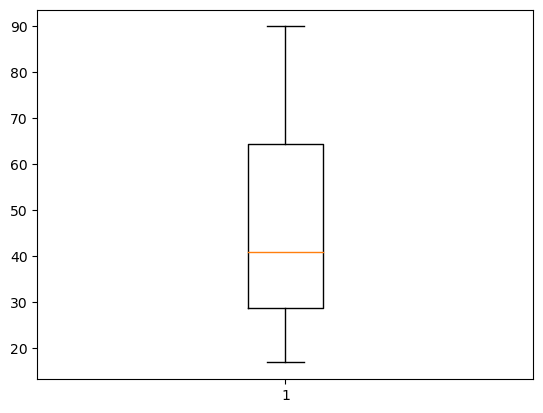

In [26]:
plt.boxplot(data['Overall Load'])

In [29]:
data['Overall Load'].quantile([0.25,0.50,0.75,1.0])

0.25    28.750
0.50    40.970
0.75    64.335
1.00    89.950
Name: Overall Load, dtype: float64

# Adding column for classes for efficiency

In [31]:
data['Efficiency'] = np.where(data['Overall Load']<29, 'Low', np.where(data['Overall Load']<64, 'Average', 'High'))
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,Average


In [32]:
data.shape

(768, 12)

In [33]:
data['Efficiency'].value_counts()

Average    368
Low        207
High       193
Name: Efficiency, dtype: int64

<AxesSubplot:xlabel='Efficiency', ylabel='count'>

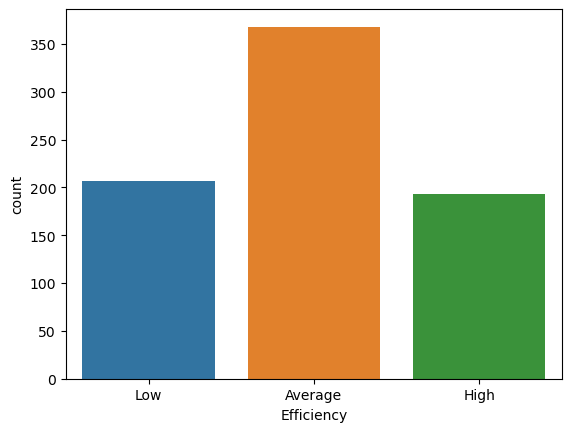

In [34]:
sns.countplot(x='Efficiency',data=data, order=['Low','Average','High'])

# Creating different datasets for differentY variables

# Dataset for heating load

In [36]:
data_heat = data.drop(columns=['Cooling Load','Overall Load','Efficiency'])

In [37]:
data_heat

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [38]:
data_heat.shape

(768, 9)

# Data set for cooling load

In [39]:
data_cool = data.drop(columns=['Heating Load','Overall Load','Efficiency'])
data_cool.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [40]:
data_cool.shape

(768, 9)

# Data set for efficiency classification

In [42]:
data_eff = data.drop(columns=['Cooling Load','Heating Load','Overall Load'])
data_eff.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Average


# Models for predicting heating load

# Data Preprocessing

In [52]:
x=data_heat.drop(columns=('Heating Load'))
y=data_heat['Heating Load']

In [53]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating Load, dtype: float64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_test)
x_test = scaler.transform(x_test)

In [55]:
from keras.models import Sequential
from keras.layers import Dense

nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train, y_train, batch_size=10, epochs=100)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [56]:
from sklearn.metrics import r2_score

y_train_predict = nn_reg.predict(X_train)
y_test_predict = nn_reg.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

NameError: name 'nn_reg' is not defined